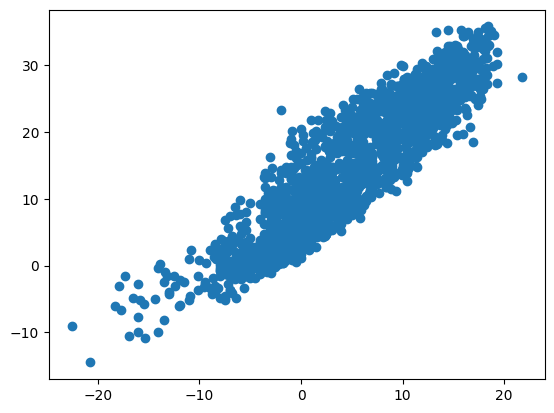

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

smog = pd.read_csv('data/smog_pszczyna.csv', sep=';', decimal=',', encoding='utf-8')

smog['pm10_poziom'] = np.where(smog['pm10'] >= 50, 'powyższony', 'w normie')
smog['tmin_zero'] = np.where(smog['tmin_daily'] < 0, 'poniżej zera', 'powyżej zera')

smog2017 = smog[smog['rok'] == 2017].copy()

plt.scatter(smog['tmin_daily'], smog['tmax_daily'])

# Test niezależności

H0: poziom pm10 i kategoria temperatury są niezależne

H1: poziom pm10 i kategoria temperatury nie są niezależne

Poziom istotności: 0.05

In [10]:
tablica_kontyngencji = pd.crosstab(smog2017['pm10_poziom'], smog2017['tmin_zero'])
print(tablica_kontyngencji)

tmin_zero    poniżej zera  powyżej zera
pm10_poziom                            
powyższony             60            44
w normie               27           234


In [12]:
from scipy.stats import chi2_contingency

chi2_contingency(tablica_kontyngencji)

Chi2ContingencyResult(statistic=np.float64(89.24295065190263), pvalue=np.float64(3.491849372643208e-21), dof=1, expected_freq=array([[ 24.7890411,  79.2109589],
       [ 62.2109589, 198.7890411]]))

In [15]:
statystyka, p_value, df, expected = chi2_contingency(tablica_kontyngencji)

print(f"Statystyka: {statystyka}, p-value: {np.round(p_value,5)}, df: {df}")

Statystyka: 89.24295065190263, p-value: 0.0, df: 1


Wartość p < 0.05, więc mamy podstawy do odrzucenia hipotezy zerowej. Oznacza to, że poziom pm10 i kategoria temperatury nie są niezależne.

# Test propocji

H0: odsetek palaczy wśród mężczyzn i kobiet jest taki sam

H1: odsetek palaczy wśród mężczyzn i kobiet nie jest taki sam

Poziom istotności: 0.05

In [16]:
palacze = np.array([200, 250])
ogolem = np.array([500, 600])
palacze/ogolem

array([0.4       , 0.41666667])

In [18]:
from statsmodels.stats.proportion import proportions_ztest

statystyka, p_value = proportions_ztest(palacze, ogolem)

print(f"Statystyka: {statystyka}, p-value: {np.round(p_value,5)}")

Statystyka: -0.5598127485064209, p-value: 0.57561


Wartość p-value > 0.05, więc nie mamy podstaw do odrzucenia hipotezy zerowej. Oznacza to, że odsetek palaczy wśród mężczyzn i kobiet jest taki sam.

# Test normalności

HO: rozkład temperatury jest normalny

H1: rozkład temperatury nie jest normalny

Poziom istotności: 0.05

In [22]:
from scipy.stats import shapiro, kstest

shapiro(smog["t2m_mean_daily"])

statystyka, p_value = shapiro(smog["t2m_mean_daily"])
print(f"Statystyka: {statystyka}, p-value: {np.round(p_value,5)}")

Statystyka: 0.9834148126689464, p-value: 0.0


Wartość p < 0.05, więc mamy podstawy do odrzucenia hipotezy zerowej. Oznacza to, że rozkład temperatury nie jest normalny.

In [23]:
kstest(smog["t2m_mean_daily"], 'norm')

statystyka, p_value = kstest(smog["t2m_mean_daily"], 'norm')
print(f"Statystyka: {statystyka}, p-value: {np.round(p_value,5)}")

Statystyka: 0.78831229959618, p-value: 0.0


Wartość p < 0.05, więc mamy podstawy do odrzucenia hipotezy zerowej. Oznacza to, że rozkład temperatury nie jest normalny.

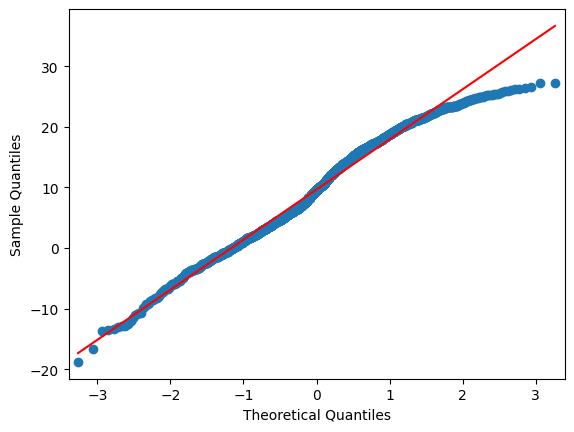

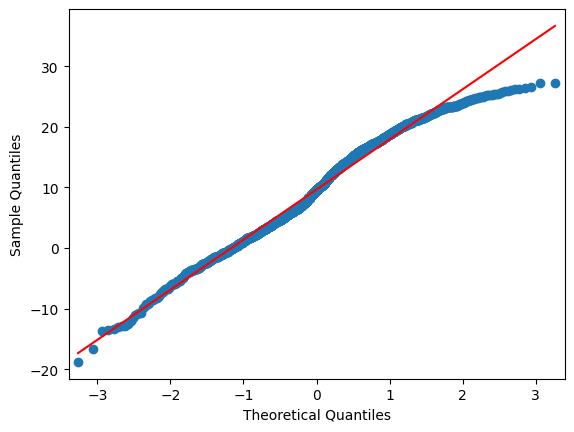

In [ ]:
# Wykres kwantyl-kwantyl

from statsmodels.graphics.gofplots import qqplot

qqplot(smog["t2m_mean_daily"], line='s')

# Test dla dwóch prób zależnych

H0: minimalna i mksymalna temperatura są takie same

H1: minimalna i mksymalna temperatura są różne

Poziom istotności: 0.05

In [28]:
from scipy.stats import wilcoxon

wilcoxon(smog2017['tmin_daily'], smog2017['tmax_daily'])

WilcoxonResult(statistic=np.float64(0.0), pvalue=np.float64(1.4305239047299807e-61))

In [29]:
statystyka, p_value = wilcoxon(smog2017['tmin_daily'], smog2017['tmax_daily'])
print(f"Statystyka: {statystyka}, p-value: {np.round(p_value,5)}")

Statystyka: 0.0, p-value: 0.0


Wartość p < 0.05, więc mamy podstawy do odrzucenia hipotezy zerowej. Minimalna i maksymalna temperatura są różne.

In [30]:
from scipy.stats import ttest_rel, ttest_ind

ttest_rel(smog2017['tmin_daily'], smog2017['tmax_daily'])

TtestResult(statistic=np.float64(-40.18165022951711), pvalue=np.float64(7.073981723467218e-136), df=np.int64(364))

# Test dla dwóch prób niezależnych

H0: średnia temperatura w grupach pm10 jest taka sama

H1: średnia temperatura w grupach pm10 jest różna

Poziom istotności: 0.05

In [31]:
from scipy.stats import mannwhitneyu

grupa1 = smog2017[smog2017['pm10_poziom'] == 'powyższony']['t2m_mean_daily']
grupa2 = smog2017[smog2017['pm10_poziom'] == 'w normie']['t2m_mean_daily']

mannwhitneyu(grupa1, grupa2)

MannwhitneyuResult(statistic=np.float64(3819.5), pvalue=np.float64(8.38008470146249e-27))

Wartość p < 0.05, więc mamy podstawy do odrzucenia hipotezy zerowej. Średnia temperatura w grupach pm10 jest różna.

# Test dla wielu grup

H0: średnia temperatura w kwartałach jest taka sama

H1: istnieje co najmniej jedna para kwartałów, w których średnia temperatura jest różna

Poziom istotności: 0.05



In [34]:
from scipy.stats import kruskal

# smog2017['t2m_mean_daily'] = smog2017['t2m_mean_daily'].fillna(smog2017['t2m_mean_daily'].mean())

kwartal1 = smog2017[smog2017['kwartal'] == "Kwartał 1"]['t2m_mean_daily']
kwartal2 = smog2017[smog2017['kwartal'] == "Kwartał 2"]['t2m_mean_daily']
kwartal3 = smog2017[smog2017['kwartal'] == "Kwartał 3"]['t2m_mean_daily']
kwartal4 = smog2017[smog2017['kwartal'] == "Kwartał 4"]['t2m_mean_daily']

statystyka, p_value = kruskal(kwartal1, kwartal2, kwartal3, kwartal4)
print(f"Statystyka: {statystyka}, p-value: {np.round(p_value,5)}")

Statystyka: 235.07781183253738, p-value: 0.0


Wartość p < 0.05, więc mamy podstawy do odrzucenia hipotezy zerowej. Istnieje co najmniej jedna para kwartałów, w których średnia temperatura jest różna.

In [ ]:
! pip install scikit-posthocs

In [38]:
from scikit_posthocs import posthoc_dunn

dunn_results = posthoc_dunn(smog2017, val_col='t2m_mean_daily', group_col='kwartal', p_adjust='holm')
print(np.round(dunn_results,5))

           Kwartał 1  Kwartał 2  Kwartał 3  Kwartał 4
Kwartał 1    1.00000    0.00000    0.00000    0.00129
Kwartał 2    0.00000    1.00000    0.00129    0.00000
Kwartał 3    0.00000    0.00129    1.00000    0.00000
Kwartał 4    0.00129    0.00000    0.00000    1.00000


Wszystkie kwartały różnią się od siebie istotnie statystycznie.

## Test ANOVA

In [39]:
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(kwartal1, kwartal2, kwartal3, kwartal4)
print(f"Statystyka F: {f_stat}, p-value: {np.round(p_value,5)}")

Statystyka F: 197.46183154364854, p-value: 0.0


In [41]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_results = pairwise_tukeyhsd(smog2017['t2m_mean_daily'], smog2017['kwartal'], alpha=0.05)
print(tukey_results)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj  lower    upper   reject
-----------------------------------------------------------
Kwartał 1 Kwartał 2  13.2681   0.0  11.2298  15.3064   True
Kwartał 1 Kwartał 3  17.3619   0.0  15.3291  19.3946   True
Kwartał 1 Kwartał 4   5.1891   0.0   3.1563   7.2218   True
Kwartał 2 Kwartał 3   4.0938   0.0   2.0667   6.1209   True
Kwartał 2 Kwartał 4   -8.079   0.0 -10.1061  -6.0519   True
Kwartał 3 Kwartał 4 -12.1728   0.0 -14.1944 -10.1513   True
-----------------------------------------------------------
